In [1]:
!pip install xlrd
!pip install openpyxl

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [129]:
import pandas as pd

df_1 = pd.read_excel('data.xlsx', sheet_name='slot_Table',engine='openpyxl')
df_2 = pd.read_excel('data.xlsx', sheet_name='location_Table',engine='openpyxl')



In [130]:
df_1.head()

employer_id  city_id  contract_id              start_date  \
0   4277920.00     9767      2423796 2017-10-30 00:00:00.000   
1   2372986.67     8585      2074128 2017-06-29 00:00:00.000   
2   1142693.33     6665      1924740 2017-05-02 00:00:00.000   
3   1353893.33     5165      1942512 2017-05-09 00:00:00.000   
4    922426.67     3882      1380984 2016-09-19 15:14:21.707   

                 end_date  renewed_flag  job_slots  total_contract_value  \
0 2017-11-30 23:59:59.000             1         15                   995   
1 2017-07-29 23:59:59.000             0         50                  1495   
2 2017-06-02 23:59:59.000             0         15                   495   
3 2017-06-06 23:59:59.000             0         15                   995   
4 2016-10-20 15:14:20.707             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  
0           215                 255                 15484.40            25  
1            55                  70                  1719.30            50  
2            45                  95                  1195.75            20  
3           155                 175                  1197.35            20  
4           150                 185                  8889.70            20

In [131]:
df_2.head()

city_id         city_name state_id state_name
0        1          Rockford       OH       Ohio
1        2    Sedgewickville       MO   Missouri
2        3        Whitehouse       OH       Ohio
3        4            Victor       IA       Iowa
4        5  Pacific Junction       IA       Iowa

In [132]:
df_1.shape,df_2.shape

((37757, 12), (11458, 4))

In [133]:
df_merged = pd.merge(df_1, df_2, on='city_id',how='left')

In [134]:
df_merged.shape

(37757, 15)

In [135]:
df_merged.to_csv('merged_data.csv')

In [136]:
df_merged.head()

employer_id  city_id  contract_id              start_date  \
0   4277920.00     9767      2423796 2017-10-30 00:00:00.000   
1   2372986.67     8585      2074128 2017-06-29 00:00:00.000   
2   1142693.33     6665      1924740 2017-05-02 00:00:00.000   
3   1353893.33     5165      1942512 2017-05-09 00:00:00.000   
4    922426.67     3882      1380984 2016-09-19 15:14:21.707   

                 end_date  renewed_flag  job_slots  total_contract_value  \
0 2017-11-30 23:59:59.000             1         15                   995   
1 2017-07-29 23:59:59.000             0         50                  1495   
2 2017-06-02 23:59:59.000             0         15                   495   
3 2017-06-06 23:59:59.000             0         15                   995   
4 2016-10-20 15:14:20.707             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  \
0           215                 255                 15484.40            25   
1            55                  70                  1719.30            50   
2            45                  95                  1195.75            20   
3           155                 175                  1197.35            20   
4           150                 185                  8889.70            20   

    city_name state_id    state_name  
0       Kaser       NY      New York  
1      Mexico       PA  Pennsylvania  
2  Seagoville       TX         Texas  
3      Tyrone       PA  Pennsylvania  
4    Capitola       CA    California

In [137]:

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employer_id              37757 non-null  float64       
 1   city_id                  37757 non-null  int64         
 2   contract_id              37757 non-null  int64         
 3   start_date               37757 non-null  datetime64[ns]
 4   end_date                 37757 non-null  datetime64[ns]
 5   renewed_flag             37757 non-null  int64         
 6   job_slots                37757 non-null  int64         
 7   total_contract_value     37757 non-null  int64         
 8   applications             37757 non-null  int64         
 9   apply_start_clicks       37757 non-null  int64         
 10  click_marketplace_value  37757 non-null  float64       
 11  job_listings             37757 non-null  int64         
 12  city_name                37757 n

In [138]:
df_merged.isnull().sum()

employer_id                0
city_id                    0
contract_id                0
start_date                 0
end_date                   0
renewed_flag               0
job_slots                  0
total_contract_value       0
applications               0
apply_start_clicks         0
click_marketplace_value    0
job_listings               0
city_name                  0
state_id                   0
state_name                 0
dtype: int64

In [139]:
df_merged['renewed_flag'].value_counts()

1    26558
0    11199
Name: renewed_flag, dtype: int64

<AxesSubplot:xlabel='renewed_flag', ylabel='count'>

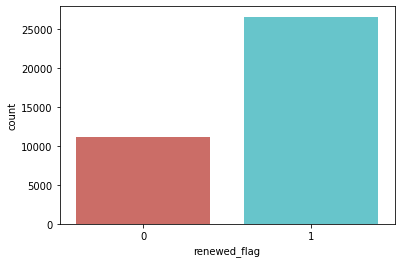

In [140]:
sns.countplot(x='renewed_flag',data=df_merged,palette='hls')




In [141]:
df_merged.columns

Index(['employer_id', 'city_id', 'contract_id', 'start_date', 'end_date',
       'renewed_flag', 'job_slots', 'total_contract_value', 'applications',
       'apply_start_clicks', 'click_marketplace_value', 'job_listings',
       'city_name', 'state_id', 'state_name'],
      dtype='object')

### Data processing

In [146]:
df_merged.head()

employer_id  city_id  contract_id              start_date  \
0   4277920.00     9767      2423796 2017-10-30 00:00:00.000   
1   2372986.67     8585      2074128 2017-06-29 00:00:00.000   
2   1142693.33     6665      1924740 2017-05-02 00:00:00.000   
3   1353893.33     5165      1942512 2017-05-09 00:00:00.000   
4    922426.67     3882      1380984 2016-09-19 15:14:21.707   

                 end_date  renewed_flag  job_slots  total_contract_value  \
0 2017-11-30 23:59:59.000             1         15                   995   
1 2017-07-29 23:59:59.000             0         50                  1495   
2 2017-06-02 23:59:59.000             0         15                   495   
3 2017-06-06 23:59:59.000             0         15                   995   
4 2016-10-20 15:14:20.707             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  \
0           215                 255                 15484.40            25   
1            55                  70                  1719.30            50   
2            45                  95                  1195.75            20   
3           155                 175                  1197.35            20   
4           150                 185                  8889.70            20   

    city_name state_id    state_name  
0       Kaser       NY      New York  
1      Mexico       PA  Pennsylvania  
2  Seagoville       TX         Texas  
3      Tyrone       PA  Pennsylvania  
4    Capitola       CA    California

In [147]:
df_merged[['start_date','end_date']] = df_merged[['start_date','end_date']].apply(pd.to_datetime) #if conversion required
df_merged['contract_days'] = (df_merged['end_date'] - df_merged['start_date']).dt.days

In [148]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employer_id              37757 non-null  float64       
 1   city_id                  37757 non-null  int64         
 2   contract_id              37757 non-null  int64         
 3   start_date               37757 non-null  datetime64[ns]
 4   end_date                 37757 non-null  datetime64[ns]
 5   renewed_flag             37757 non-null  int64         
 6   job_slots                37757 non-null  int64         
 7   total_contract_value     37757 non-null  int64         
 8   applications             37757 non-null  int64         
 9   apply_start_clicks       37757 non-null  int64         
 10  click_marketplace_value  37757 non-null  float64       
 11  job_listings             37757 non-null  int64         
 12  city_name                37757 n

In [149]:
df = df_merged.copy()

In [150]:


df_merged = df_merged.drop(columns=['start_date', 'end_date','state_id','city_id'])

In [151]:
df_merged.head()

employer_id  contract_id  renewed_flag  job_slots  total_contract_value  \
0   4277920.00      2423796             1         15                   995   
1   2372986.67      2074128             0         50                  1495   
2   1142693.33      1924740             0         15                   495   
3   1353893.33      1942512             0         15                   995   
4    922426.67      1380984             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  \
0           215                 255                 15484.40            25   
1            55                  70                  1719.30            50   
2            45                  95                  1195.75            20   
3           155                 175                  1197.35            20   
4           150                 185                  8889.70            20   

    city_name    state_name  contract_days  
0       Kaser      New York             31  
1      Mexico  Pennsylvania             30  
2  Seagoville         Texas             31  
3      Tyrone  Pennsylvania             28  
4    Capitola    California             30

In [152]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employer_id              37757 non-null  float64
 1   contract_id              37757 non-null  int64  
 2   renewed_flag             37757 non-null  int64  
 3   job_slots                37757 non-null  int64  
 4   total_contract_value     37757 non-null  int64  
 5   applications             37757 non-null  int64  
 6   apply_start_clicks       37757 non-null  int64  
 7   click_marketplace_value  37757 non-null  float64
 8   job_listings             37757 non-null  int64  
 9   city_name                37757 non-null  object 
 10  state_name               37757 non-null  object 
 11  contract_days            37757 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 5.0+ MB


In [157]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport

In [158]:
df_orig =df_merged.copy()

In [159]:
df_orig = df_orig.drop(columns=['employer_id', 'contract_id'])

In [160]:
profile = ProfileReport(df_orig, title="Pandas Profiling Report")

In [161]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [162]:
df_merged.isnull().sum()

employer_id                0
contract_id                0
renewed_flag               0
job_slots                  0
total_contract_value       0
applications               0
apply_start_clicks         0
click_marketplace_value    0
job_listings               0
city_name                  0
state_name                 0
contract_days              0
dtype: int64

In [163]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employer_id              37757 non-null  float64
 1   contract_id              37757 non-null  int64  
 2   renewed_flag             37757 non-null  int64  
 3   job_slots                37757 non-null  int64  
 4   total_contract_value     37757 non-null  int64  
 5   applications             37757 non-null  int64  
 6   apply_start_clicks       37757 non-null  int64  
 7   click_marketplace_value  37757 non-null  float64
 8   job_listings             37757 non-null  int64  
 9   city_name                37757 non-null  object 
 10  state_name               37757 non-null  object 
 11  contract_days            37757 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 5.0+ MB


In [164]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
df_merged['city_name'] = lab_encoder.fit_transform(df_merged['city_name'])
df_merged['state_name'] = lab_encoder.fit_transform(df_merged['state_name'])

In [165]:
df_merged.head()

employer_id  contract_id  renewed_flag  job_slots  total_contract_value  \
0   4277920.00      2423796             1         15                   995   
1   2372986.67      2074128             0         50                  1495   
2   1142693.33      1924740             0         15                   495   
3   1353893.33      1942512             0         15                   995   
4    922426.67      1380984             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  \
0           215                 255                 15484.40            25   
1            55                  70                  1719.30            50   
2            45                  95                  1195.75            20   
3           155                 175                  1197.35            20   
4           150                 185                  8889.70            20   

   city_name  state_name  contract_days  
0       3830           4             31  
1       4982           7             30  
2       7130           8             31  
3       8123           7             28  
4       1147           0             30

In [166]:
df_merged = df_merged.drop(['contract_id'],axis=1)

In [167]:
X = df_merged.drop(['renewed_flag'],axis=1)
y = df_merged.renewed_flag

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')

Training examples: 30205
Test examples: 7552


In [170]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employer_id              37757 non-null  float64
 1   renewed_flag             37757 non-null  int64  
 2   job_slots                37757 non-null  int64  
 3   total_contract_value     37757 non-null  int64  
 4   applications             37757 non-null  int64  
 5   apply_start_clicks       37757 non-null  int64  
 6   click_marketplace_value  37757 non-null  float64
 7   job_listings             37757 non-null  int64  
 8   city_name                37757 non-null  int32  
 9   state_name               37757 non-null  int32  
 10  contract_days            37757 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 4.4 MB


In [172]:
# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [173]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", accuracy_score(y_train,clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Classification Report\n",metrics.classification_report(y_test, y_pred))

Train accuracy: 0.8703856977321636
Test accuracy: 0.8670550847457628
Precision: 0.8472786352558895
Recall: 0.987876491759803
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      2273
           1       0.85      0.99      0.91      5279

    accuracy                           0.87      7552
   macro avg       0.90      0.79      0.82      7552
weighted avg       0.88      0.87      0.86      7552



In [185]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [48]:
# ### fitting data in LazyClassifier
# FS_models,fs_predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

# #checking for the best classifier 
# print(FS_models)

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier( random_state=0)

# fit the model to the training set

rfr.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [184]:
# Make predictions
y_pred_r = rfr.predict(X_test)

from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", accuracy_score(y_train,clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred_r))
print("Precision:",metrics.precision_score(y_test, y_pred_r))
print("Recall:",metrics.recall_score(y_test, y_pred_r))
print("Classification Report\n",metrics.classification_report(y_test, y_pred_r))


Train accuracy: 0.9999668928985267
Test accuracy: 0.9020127118644068
Precision: 0.8866927926392912
Recall: 0.9857927637810191
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.71      0.81      2273
           1       0.89      0.99      0.93      5279

    accuracy                           0.90      7552
   macro avg       0.92      0.85      0.87      7552
weighted avg       0.91      0.90      0.90      7552



In [175]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

contract_days             0.51
employer_id               0.14
click_marketplace_value   0.09
city_name                 0.09
apply_start_clicks        0.05
state_name                0.04
applications              0.03
total_contract_value      0.03
job_listings              0.02
job_slots                 0.00
dtype: float64

In [182]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

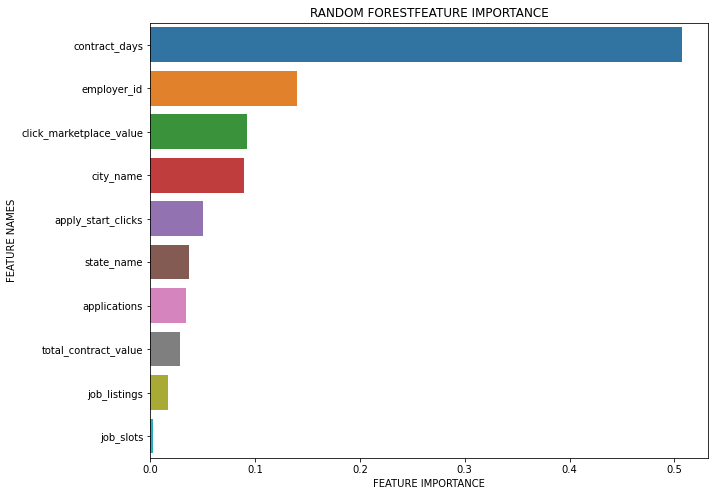

In [183]:
plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST')

### Initial EDA

In [49]:
df_merged.columns

Index(['employer_id', 'contract_id', 'renewed_flag', 'job_slots',
       'total_contract_value', 'applications', 'apply_start_clicks',
       'click_marketplace_value', 'job_listings', 'city_name', 'state_name',
       'contract_days'],
      dtype='object')

In [50]:
len(df.employer_id.unique())

11458

In [51]:
df.shape

(37757, 16)

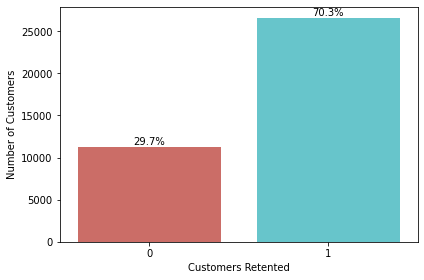

In [52]:
ax = sns.countplot(x='renewed_flag',data=df,palette='hls')
plt.xlabel('Customers Retented')
plt.ylabel('Number of Customers')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### 10000  customers did not retent while 25000 customers were retent, i.e 30 % were not rentent

In [53]:
# continuous=['renewed_flag', 'job_slots',
#        'total_contract_value', 'applications', 'apply_start_clicks',
#        'click_marketplace_value', 'job_listings','contract_days']
# df[continuous].hist(figsize=(12, 10),
#                           bins=20,
#                           layout=(4, 4),
#                           color='steelblue',
#                           edgecolor='firebrick',
#                           linewidth=1.5);

In [54]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='renewed_flag',
                  data=df,
                  palette='hls',
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Churned','Retained'])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

    sns.barplot(x=feature,
                y='renewed_flag',
                data=df,
                palette='hls',
                ax=ax2)
    ax2.set_ylabel('Retention rate')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    plt.tight_layout();

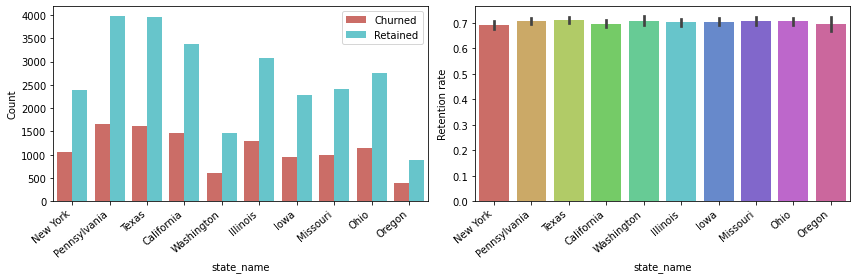

In [55]:
plot_categorical('state_name')

### Most customers  belongs from the state of Pennsylvania , Texas , California which shows high number of retention and also high number of non-rentention which implies that the business in these states run efficiently ently as these states gives high value customers . 

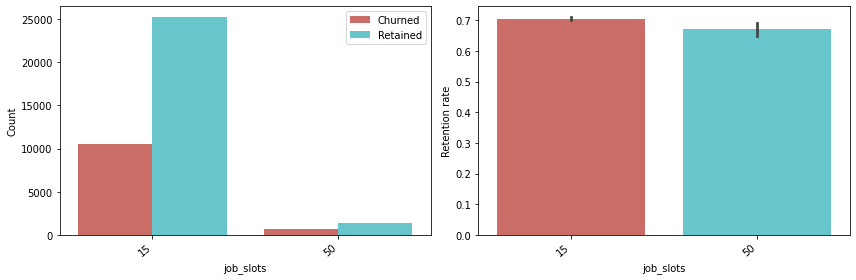

In [56]:
plot_categorical('job_slots')

### The customers having 15 job slots has more probability to retain than the customers having 50 job slots.

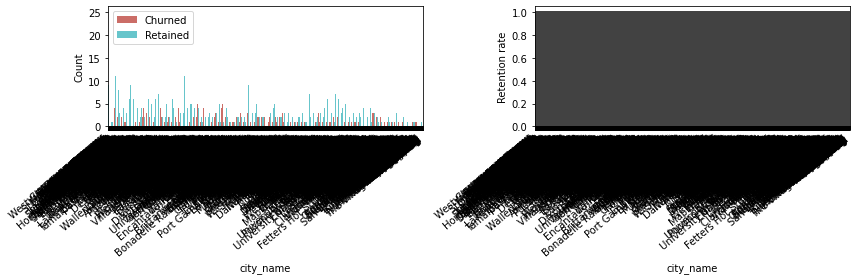

In [57]:
plot_categorical('city_name')

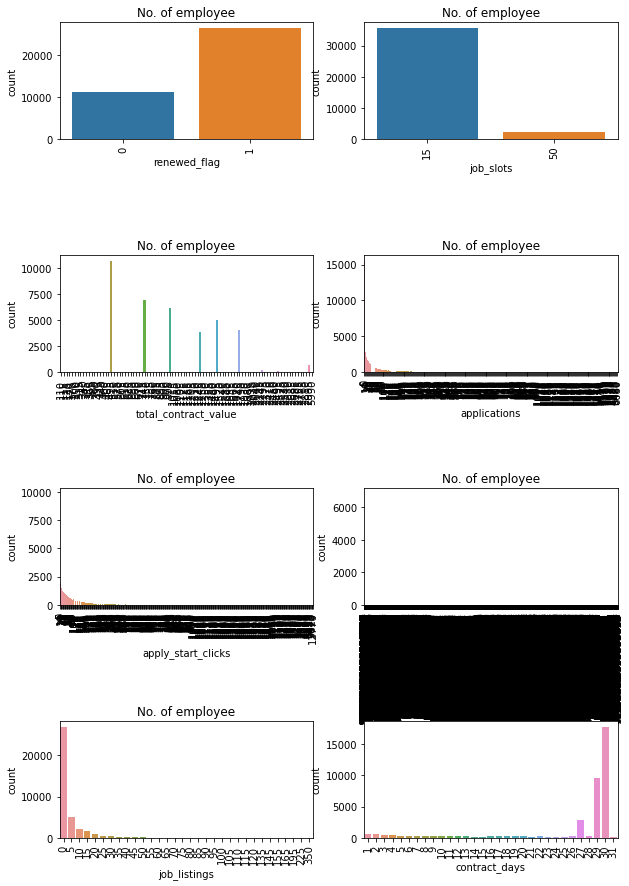

In [58]:
# ['employer_id', 'contract_id', 'renewed_flag', 'job_slots',
#        'total_contract_value', 'applications', 'apply_start_clicks',
#        'click_marketplace_value', 'job_listings', 'city_name', 'state_name',
#        'contract_days']

features=['renewed_flag', 'job_slots',
       'total_contract_value', 'applications', 'apply_start_clicks',
       'click_marketplace_value', 'job_listings','contract_days']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [59]:
#      #initially, set that counter to 1.
# df['same_customer_across_country']= df.groupby('employer_id').count() #sum function
# df.head()

df['same_customer_across_country'] = df.groupby(['employer_id'])['employer_id'].transform('count')
df.head()

employer_id  city_id  contract_id              start_date  \
0   4277920.00     9767      2423796 2017-10-30 00:00:00.000   
1   2372986.67     8585      2074128 2017-06-29 00:00:00.000   
2   1142693.33     6665      1924740 2017-05-02 00:00:00.000   
3   1353893.33     5165      1942512 2017-05-09 00:00:00.000   
4    922426.67     3882      1380984 2016-09-19 15:14:21.707   

                 end_date  renewed_flag  job_slots  total_contract_value  \
0 2017-11-30 23:59:59.000             1         15                   995   
1 2017-07-29 23:59:59.000             0         50                  1495   
2 2017-06-02 23:59:59.000             0         15                   495   
3 2017-06-06 23:59:59.000             0         15                   995   
4 2016-10-20 15:14:20.707             1         15                   745   

   applications  apply_start_clicks  click_marketplace_value  job_listings  \
0           215                 255                 15484.40            25   
1            55                  70                  1719.30            50   
2            45                  95                  1195.75            20   
3           155                 175                  1197.35            20   
4           150                 185                  8889.70            20   

    city_name state_id    state_name  contract_days  \
0       Kaser       NY      New York             31   
1      Mexico       PA  Pennsylvania             30   
2  Seagoville       TX         Texas             31   
3      Tyrone       PA  Pennsylvania             28   
4    Capitola       CA    California             30   

   same_customer_across_country  
0                            10  
1                             5  
2                            24  
3                             5  
4                             3

In [60]:
# # df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

# group_data = df.groupby(['employer_id'])

In [61]:
# #Distribution of the continous variable with respect to the target variable
# df_num = ['contract_days','total_contract_value','click_marketplace_value','same_customer_across_country']
# for i in df_num:

#     fig, ax = plt.subplots()

#     ax.hist(df[df['renewed_flag']==1][i], bins=15, alpha=0.5,color="green", label="Retention")
#     ax.hist(df[df['renewed_flag']==0][i], bins=15, alpha=0.5,color="red", label="NO Retention")

#     ax.set_xlabel(i)
#     ax.set_ylabel("Frequency")

#     ax.legend();
    
    
# # #Distribution of the continous variable with respect to the target variable
# # for i in df_num:
    
# #     fig, ax = plt.subplots()

# #     ax.hist(df[df['Churn']=='No'][i], bins=15, alpha=0.5, color="red", label="No")
# #     ax.hist(df[df['Churn']=='Yes'][i], bins=15, alpha=0.5, color="blue", label="Yes")

# #     ax.set_xlabel(i)
# #     ax.set_ylabel("Frequency")

# #     ax.legend();

In [62]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = df.copy()
    df_func['renewed_flag'] = df_func['renewed_flag'].astype('category')
    
    
    
    colors = ['green','red']

    for df1, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        ax1 = sns.histplot(data=df1,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False
                     )
        ax1.legend()
    
    plt.tight_layout();


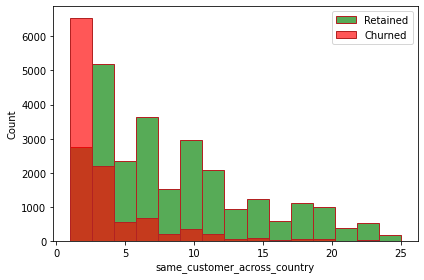

In [63]:
df_churned = df[df['renewed_flag'] == 0]
df_retained = df[df['renewed_flag'] == 1]

plot_continuous('same_customer_across_country')

### The graph implies that If the  customers are taking the products across the country they are less likely to retain. Such frequent customers are on red alert and should be paid more attention to .

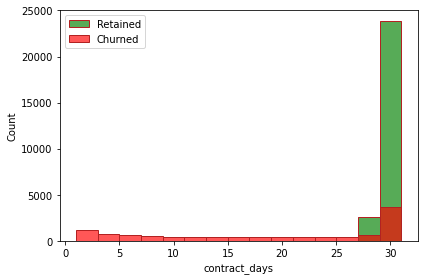

In [64]:
df_churned = df[df['renewed_flag'] == 0]
df_retained = df[df['renewed_flag'] == 1]

plot_continuous('contract_days')

### The customers whose contract are of a month , are more likely to retain than the customers having contracts for less number of days. It will be wise to concentrate on customers serving less tenure to figure out any concerns and issues in that case.

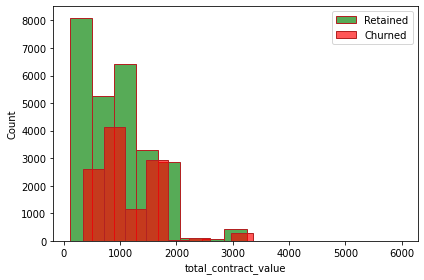

In [65]:
df_churned = df[df['renewed_flag'] == 0]
df_retained = df[df['renewed_flag'] == 1]

plot_continuous('total_contract_value')

### As the total contract value increases , the chances of customer to retain is really less .That implies that they are then looking  for other affordable options. Business should focus on customers demands and try to negotiate.

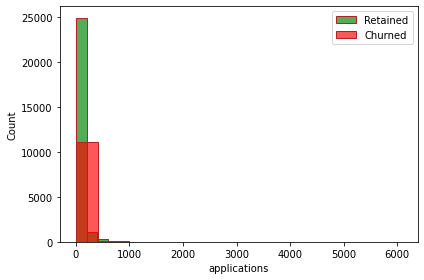

In [66]:


df_churned = df[df['renewed_flag'] == 0]
df_retained = df[df['renewed_flag'] == 1]

plot_continuous('applications')

In [67]:
# count_retention_per_city = df.renewed_flag.eq(0).astype(int).groupby(df.city_name).sum()
# count_retention_per_city = pd.DataFrame(count_retention_per_city,reset).reset_index()
# print(count_retention_per_city.to_string())


count_retention_per_city =  df.renewed_flag.eq(0).astype(int).groupby(df.city_name).sum().reset_index()
count_retention_per_city.head()

city_name  renewed_flag
0            Abbott             0
1          Aberdeen             5
2  Aberdeen Gardens             0
3         Abernathy             1
4           Abilene             1

In [68]:
zero_retention_city = count_retention_per_city[count_retention_per_city['renewed_flag']==0]['city_name']
fair_rentention_city = count_retention_per_city[count_retention_per_city['renewed_flag']!=0]['city_name']

In [69]:
print("Number of Cities having zero retention rate :",len(zero_retention_city))
print("Number of Cities retention rate :",len(fair_rentention_city))

Number of Cities having zero retention rate : 2794
Number of Cities retention rate : 6115


In [70]:
for p in zero_retention_city: print(p)

Abbott
Aberdeen Gardens
Acampo
Accord
Ackworth
Acton
Adair Village
Adamsburg
Adelphi
Adena
Advance
Aguanga
Aguilares
Airmont
Albertson
Alderton
Alderwood Manor
Aldine
Aldrich
Alexandria Bay
Alfred
Alger
Alice
Alice Acres
Alleghany
Allenport
Allensworth
Allenwood
Allison
Allison Park
Almanor
Alondra Park
Alpaugh
Alpha
Alsace Manor
Altadena
Alto Pass
Altona
Alum Rock
Alvan
Alvarado
Amador City
Amagansett
Amanda Park
Amargosa
Amarillo
Amelia
American Canyon
Ames Lake
Amityville
Amoret
Anchor Bay
Angels
Angola on the Lake
Angwin
Ankeny
Annawan
Annetta North
Anniston
Annville
Anson
Anton
Apollo
Apple Canyon Lake
Apple River
Applewold
Aptos Hills-Larkin Valley
Arbuckle
Arcadia University
Arcanum
Arden-Arcade
Arenzville
Arkoe
Armington
Armonk
Arnot
Aroma Park
Aromas
Arp
Arrow Point
Arroyo Colorado Estates
Arroyo Gardens
Artesia
Asharoken
Asherton
Asotin
Aspers
Assumption
Astoria
Atascocita
Atlanta
Atlas
Auberry
Aubrey
Auburn Lake Trails
Austinburg
Austintown
Avila Beach
Avocado Heights
Avonmo

Spragueville
Spray
Spring
Spring House
Springerton
Springs
Spur
Squaw Valley
St. Anne
St. Clair
St. Clairsville
St. Cloud
St. David
St. Hedwig
St. Helena
St. Jo
St. Johnsville
St. Libory
St. Mary
St. Paris
St. Peters
St. Regis Falls
St. Thomas
Stallion Springs
Staples
Star Lake
Staunton
Stayton
Steele
Steelville
Stephenville
Steptoe
Stevens
Stevenson
Stevenson Ranch
Stewart
Stickney
Stillman Valley
Stillwater
Stinnett
Stirling City
Stockport
Stone Creek
Stoneboro
Stony Creek Mills
Stony Ridge
Stonyford
Storm Lake
Stotesbury
Stout
Stoutland
Stoutsville
Strattanville
Streetman
Strong
Strongsville
Stryker
Study Butte
Sudan
Sugar Bush Knolls
Sugar Land
Sugarcreek
Sugarloaf Saw Mill
Sultana
Sumas
Summerhill
Summerside
Summit Hill
Summit View
Sun River Terrace
Sunnyside
Sunrise Beach Village
Sunrise Lake
Sunset
Suquamish
Sutersville
Sutherland
Sutter Creek
Swanton
Swarthmore
Sweet Springs
Sweetwater
Swisher
Swissvale
Swoyersville
Sycamore
Sycamore Hills
Sylvan Beach
Symerton
Table Grove
Taft

### Only 

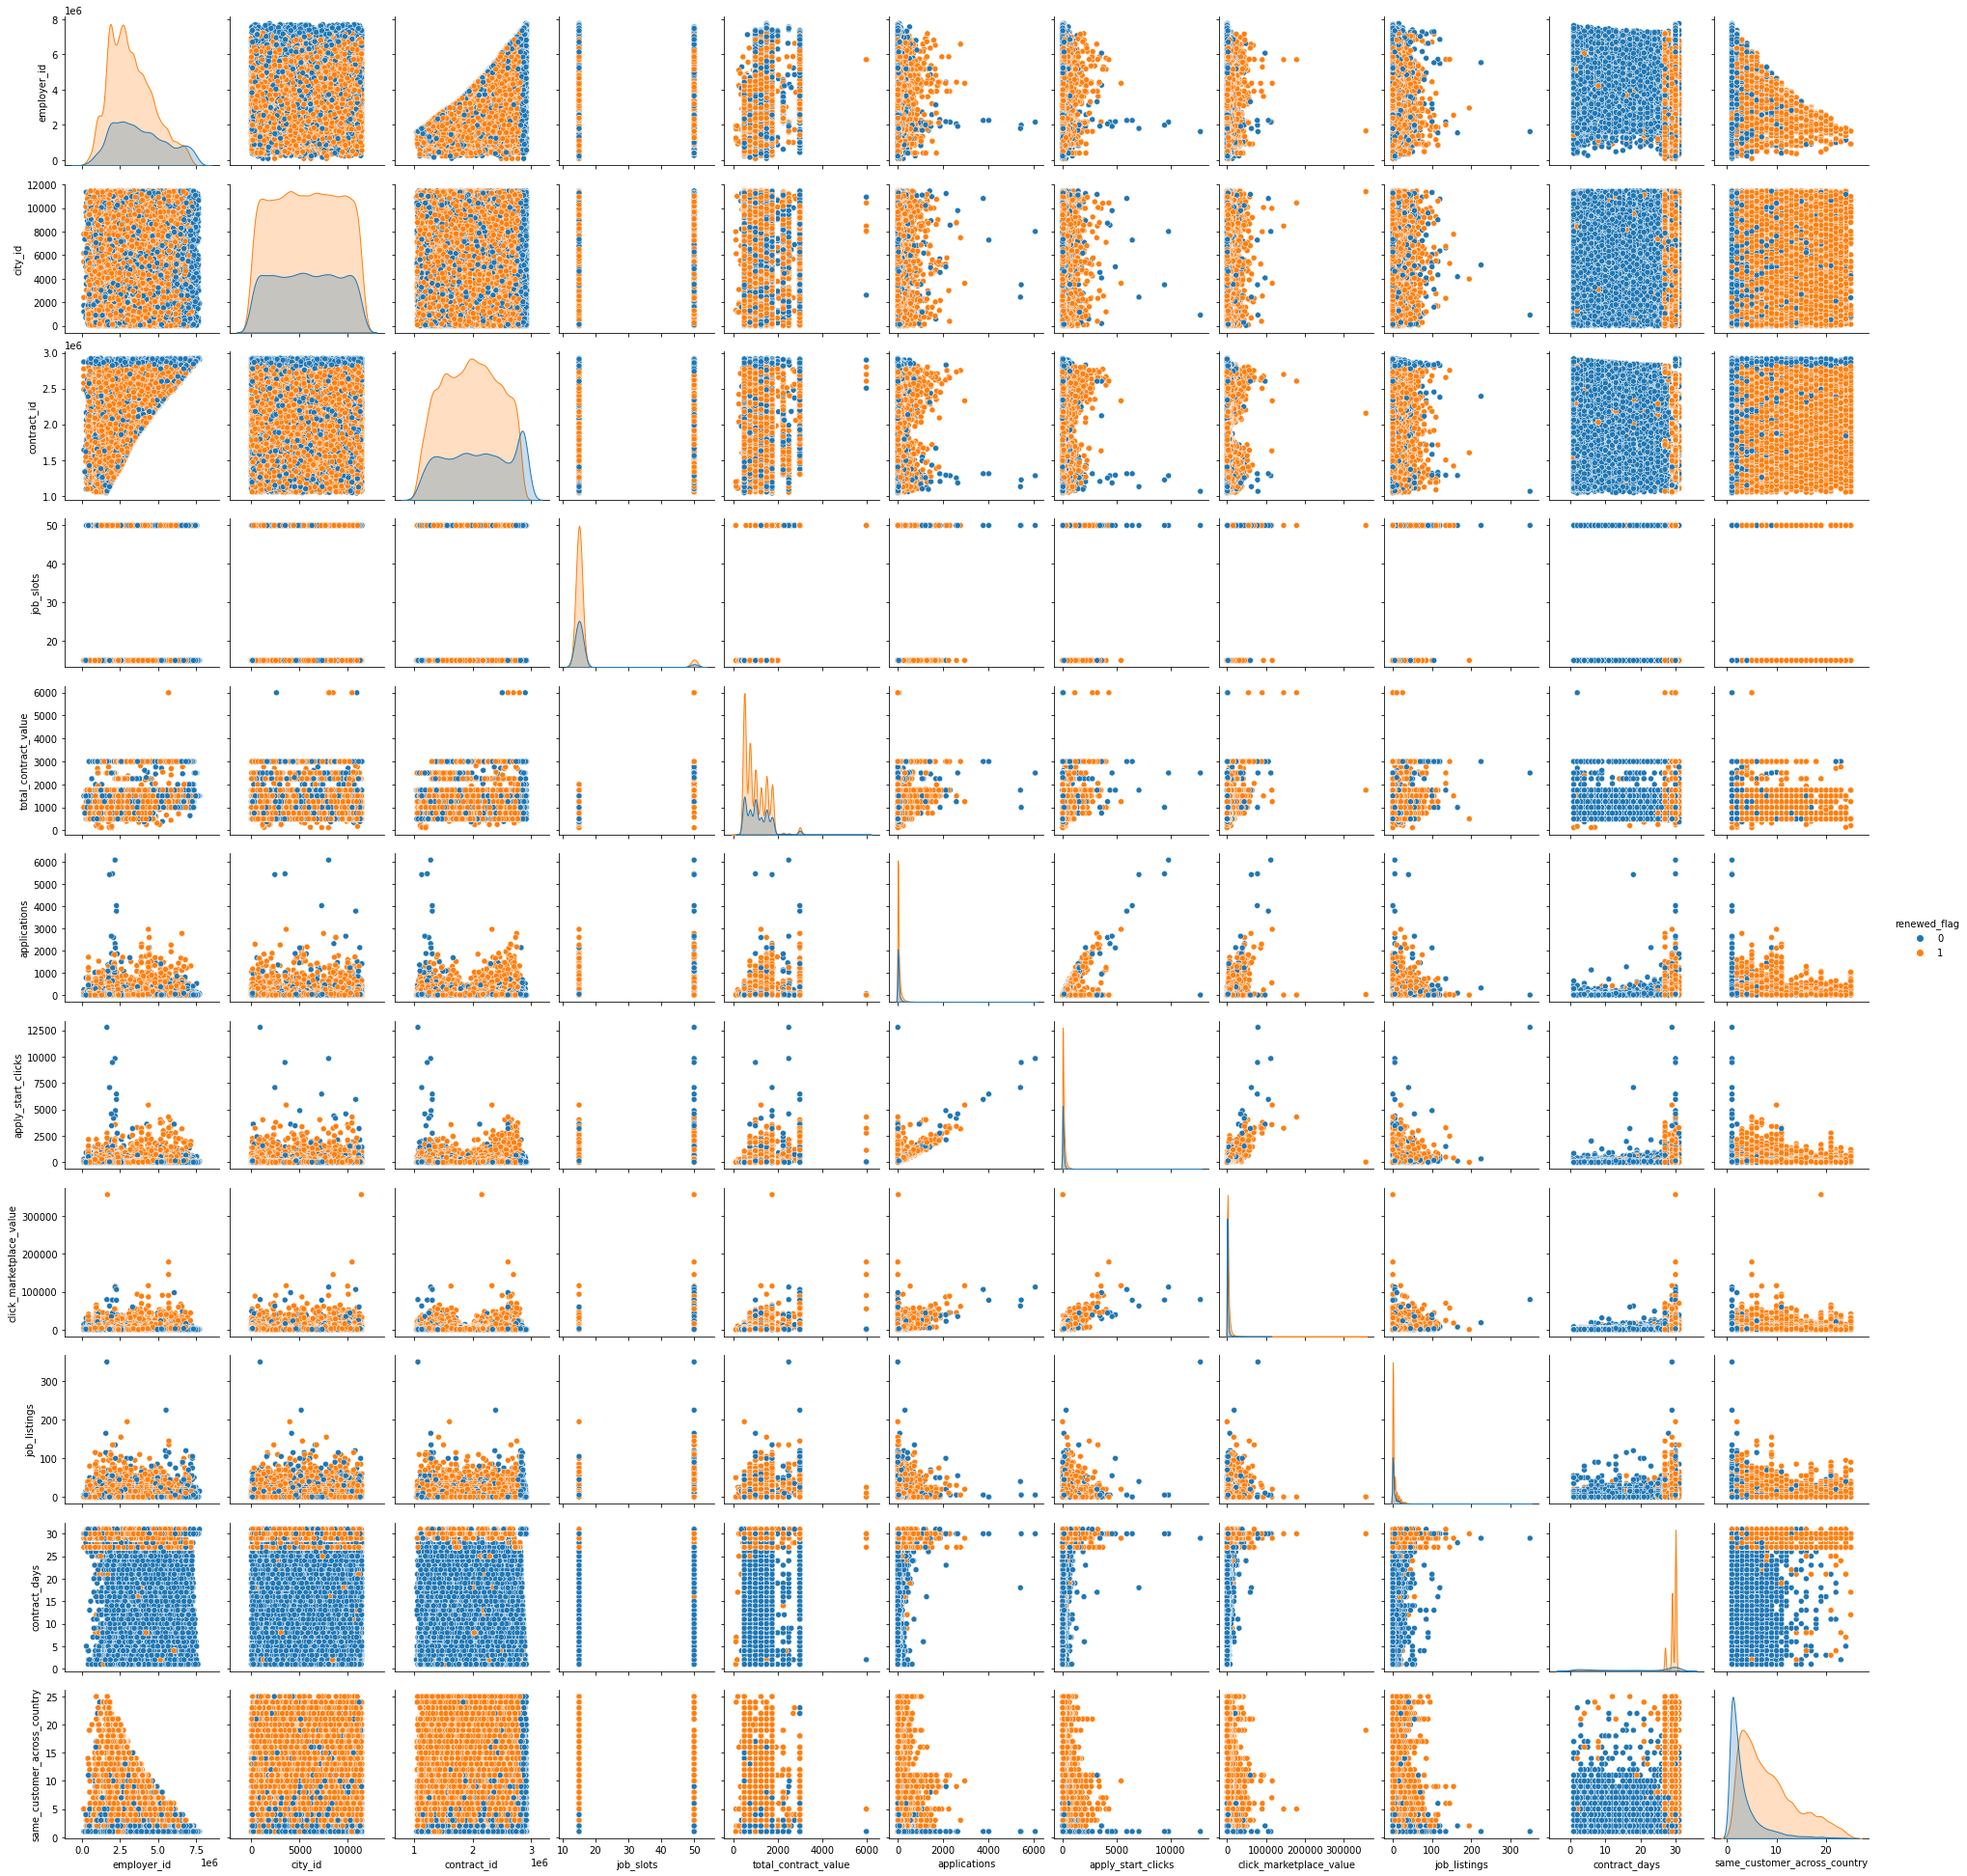

In [71]:
sns.pairplot(data=df,hue='renewed_flag')

### We will do behavioral segmentation by Recency, Frequency, and Monetary which will be calculated later. Let us look into the definitions before proceeding further.

Recency: Number of days since the last purchase

Frequency: Number of transactions made over a given period

Monetary: Amount spent over a given period of time

In [72]:
df_recency = df.groupby(by='employer_id',
                        as_index=False)['end_date'].max()
df_recency.columns = ['employer_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

employer_id    LastPurchaseDate  Recency
0     95253.33 2018-04-18 23:59:59       12
1    101013.33 2017-02-07 23:59:59      447
2    165573.33 2016-09-28 23:59:59      579
3    223706.67 2017-12-14 23:59:59      137
4    231360.00 2017-03-03 23:59:59      423

In [73]:
frequency_df = df.drop_duplicates().groupby(
    by=['employer_id'], as_index=False)['end_date'].count()
frequency_df.columns = ['employer_id', 'Frequency']
frequency_df.head()

employer_id  Frequency
0     95253.33          5
1    101013.33          1
2    165573.33          1
3    223706.67          1
4    231360.00          4

In [74]:
df['Total'] = df['total_contract_value']
monetary_df = df.groupby(by='employer_id', as_index=False)['Total'].sum()
monetary_df.columns = ['employer_id', 'Monetary']
monetary_df.head()

employer_id  Monetary
0     95253.33      4975
1    101013.33      1495
2    165573.33       745
3    223706.67       995
4    231360.00      5980

In [75]:
rf_df = df_recency.merge(frequency_df, on='employer_id')
rfm_df = rf_df.merge(monetary_df, on='employer_id').drop(
    columns='LastPurchaseDate')
rfm_df.head()

employer_id  Recency  Frequency  Monetary
0     95253.33       12          5      4975
1    101013.33      447          1      1495
2    165573.33      579          1       745
3    223706.67      137          1       995
4    231360.00      423          4      5980

In [76]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

employer_id  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0     95253.33       12          5      4975        94.08        81.46   
1    101013.33      447          1      1495        27.52        19.29   
2    165573.33      579          1       745        12.63        19.29   
3    223706.67      137          1       995        72.29        19.29   
4    231360.00      423          4      5980        30.46        75.30   

   M_rank_norm  
0        81.45  
1        19.29  
2        19.29  
3        19.29  
4        75.30

In [77]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['employer_id', 'RFM_Score']].head(7)

employer_id  RFM_Score
0     95253.33       4.17
1    101013.33       1.03
2    165573.33       0.91
3    223706.67       1.36
4    231360.00       3.43
5    240853.33       0.88
6    247626.67       0.83

In [78]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['employer_id', 'RFM_Score', 'Customer_segment']].head(20)

employer_id  RFM_Score       Customer_segment
0      95253.33       4.17    High value Customer
1     101013.33       1.03         Lost Customers
2     165573.33       0.91         Lost Customers
3     223706.67       1.36         Lost Customers
4     231360.00       3.43  Medium Value Customer
5     240853.33       0.88         Lost Customers
6     247626.67       0.83         Lost Customers
7     255760.00       1.24         Lost Customers
8     266240.00       0.90         Lost Customers
9     266960.00       3.17  Medium Value Customer
10    268746.67       2.35    Low Value Customers
11    279306.67       2.27    Low Value Customers
12    279706.67       2.88    Low Value Customers
13    304186.67       3.07  Medium Value Customer
14    314373.33       1.34         Lost Customers
15    333840.00       3.00    Low Value Customers
16    333893.33       1.02         Lost Customers
17    337413.33       2.68    Low Value Customers
18    339760.00       3.28  Medium Value Customer
19    349733.33       2.67    Low Value Customers